## Distribution Plots

In [3]:
import seaborn as sns  # sns is the convention

In [4]:
%matplotlib inline 

In [7]:
tips = sns.load_dataset('tips')    # built-in dataset of seaborn

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


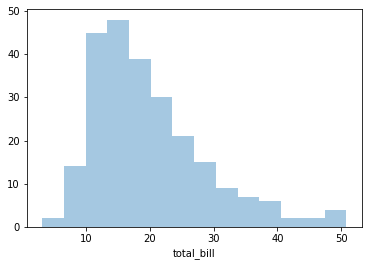

In [27]:
sns.distplot(tips["total_bill"],kde=False)

# maximum near 10 - 20
#kde - kernel density estimation 

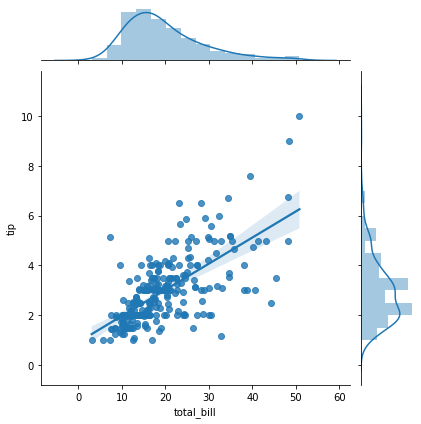

In [35]:
sns.jointplot(data=tips,x='total_bill',y='tip',kind='reg') 

# kind has different options - scatter,reg,hex,kde

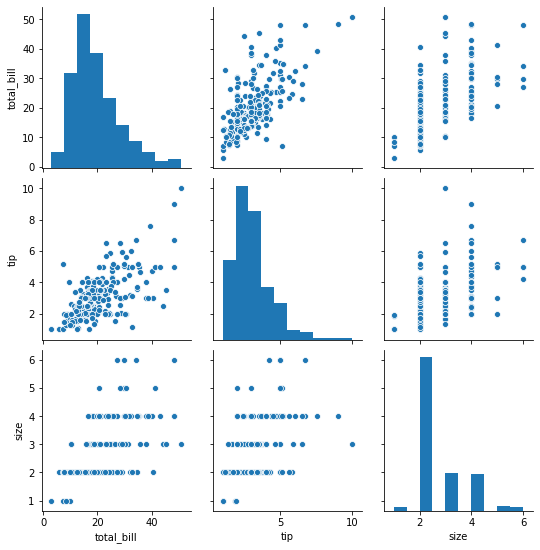

In [21]:
sns.pairplot(tips) # pair plots for all numerical values

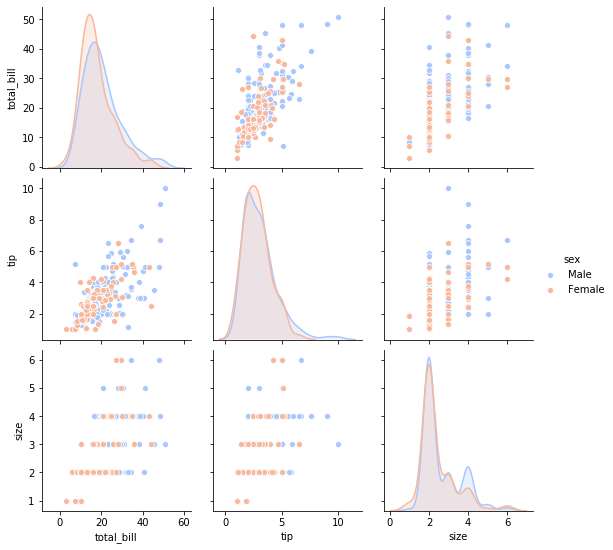

In [25]:
sns.pairplot(data=tips,hue='sex',palette='coolwarm') # pair plots for all numerical values

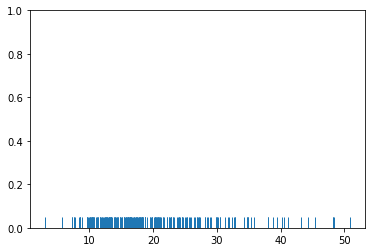

In [26]:
sns.rugplot(tips['total_bill'])   # dash mark for every single point

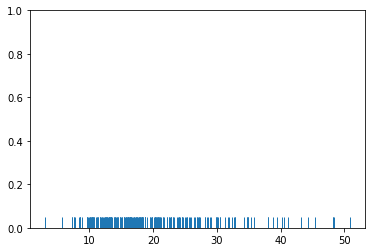

In [26]:
sns.rugplot(tips['total_bill'])   # dash mark for every single point

(0, 1)

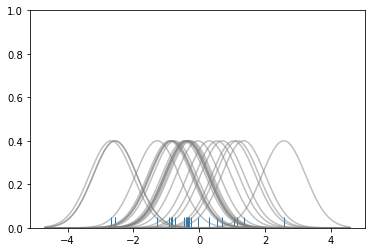

In [28]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

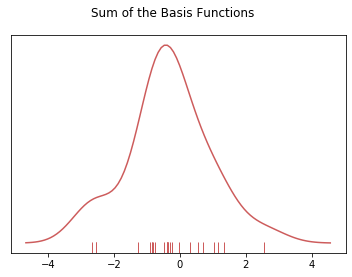

In [29]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

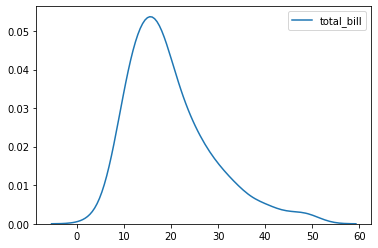

In [36]:
sns.kdeplot(tips['total_bill']) 

# KDE - kernel density estimation

## Categorical Plots

In [37]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [39]:
import numpy as np

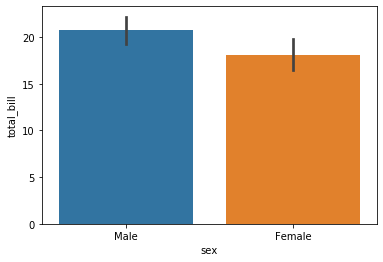

In [44]:
sns.barplot(x='sex',y='total_bill',data=tips)   # mean bar plot

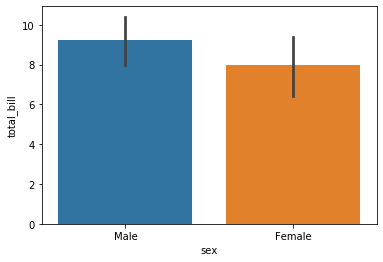

In [45]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)   

# std bar plot

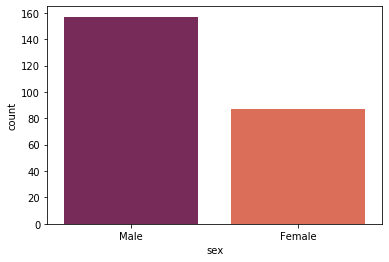

In [59]:
sns.countplot(x='sex',data=tips,palette='rocket')   # count plot 

In [90]:
# Issue

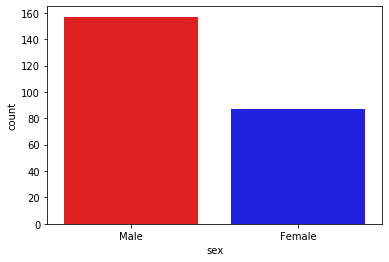

In [99]:
sns.countplot(x='sex',data=tips,palette={"Male":"red","Female":"blue"})   # count plot 

In [88]:
v = [22, 13, 45, 50, 98, 69, 43, 44, 1]
[ (x if x >=45 else x+5)  for x in v ]

[27, 18, 45, 50, 98, 69, 48, 49, 6]

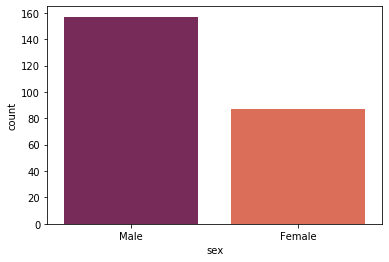

In [59]:
sns.countplot(x='sex',data=tips,palette='rocket')   # count plot 

#### Hue  

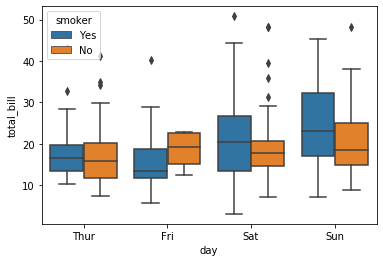

In [105]:
sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker')

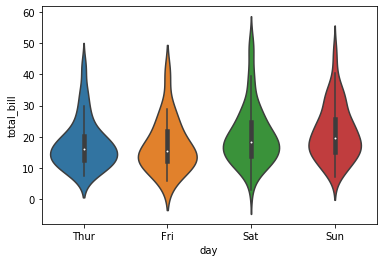

In [108]:
sns.violinplot(x='day',y='total_bill',data=tips)

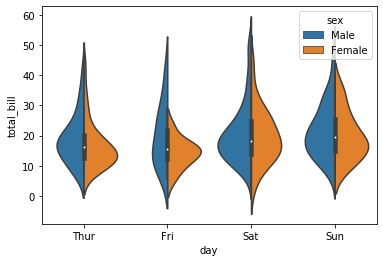

In [111]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)

# spliting the data 

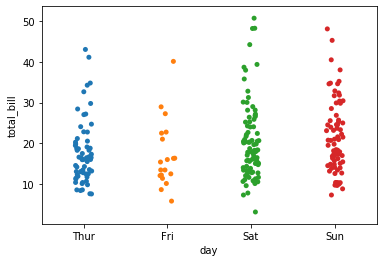

In [115]:
sns.stripplot(data=tips,x='day',y='total_bill')

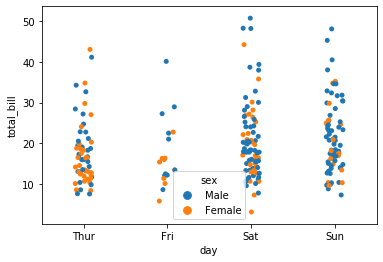

In [117]:
sns.stripplot(data=tips,x='day',y='total_bill',jitter=True,hue='sex')

#### Swarm Plots - Combination of Violin and Strip Plot

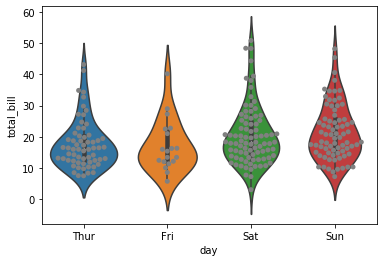

In [120]:
sns.violinplot(data=tips,x='day',y='total_bill')
sns.swarmplot(data=tips,x='day',y='total_bill',color='grey')

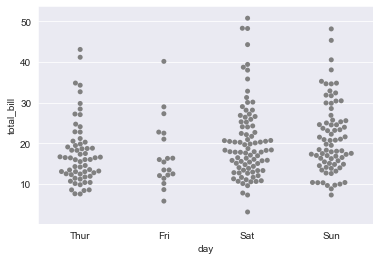

In [181]:
sns.swarmplot(data=tips,x='day',y='total_bill',color='grey')

## Factor Plot changed to Cat Plot

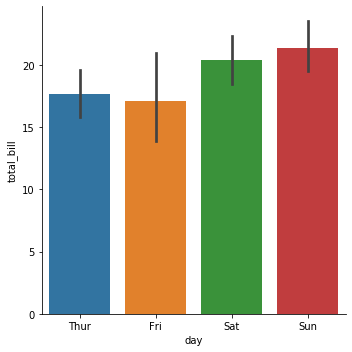

In [123]:
sns.catplot(data=tips,x='day',y='total_bill',kind='bar')

## Matrix Plots (Heat Maps)

Data must be in a matrix form

In [126]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [129]:
tc = tips.corr()     # matrix form of data

In [130]:
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


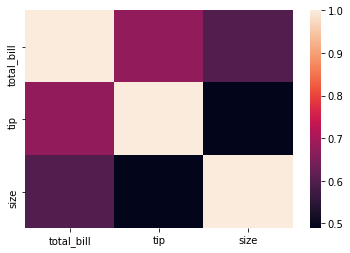

In [131]:
sns.heatmap(tc)

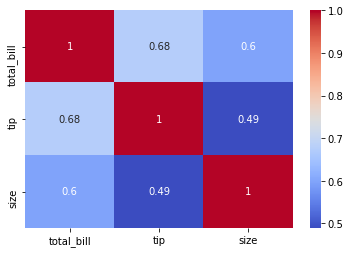

In [135]:
sns.heatmap(tc,annot=True,cmap='coolwarm')  

# annot and cmap are optional

In [138]:
fp = flights.pivot_table(index='month',columns='year',values='passengers')

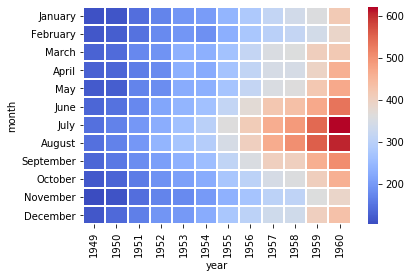

In [143]:
sns.heatmap(fp,cmap='coolwarm',linewidths=1)    #linewidth

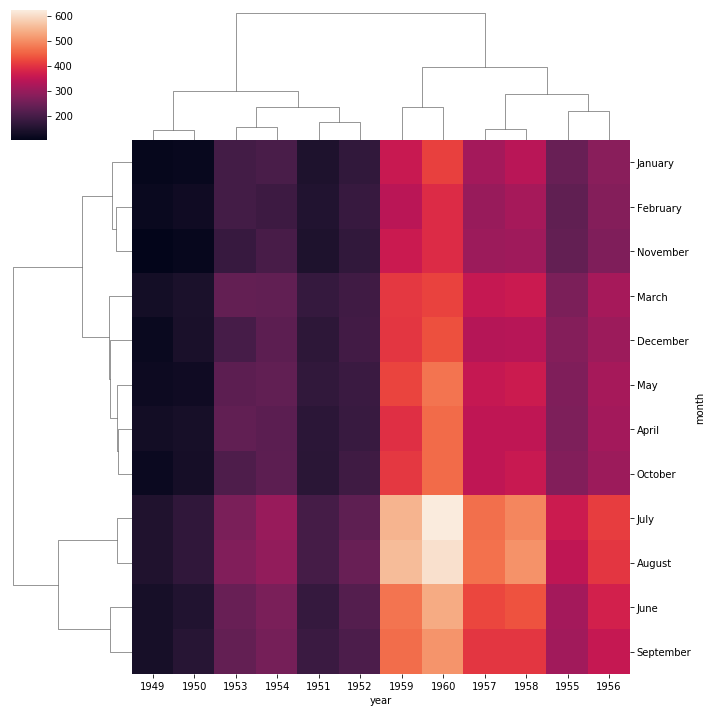

In [144]:
sns.clustermap(fp)

## Lecture 51 - Grids

In [145]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


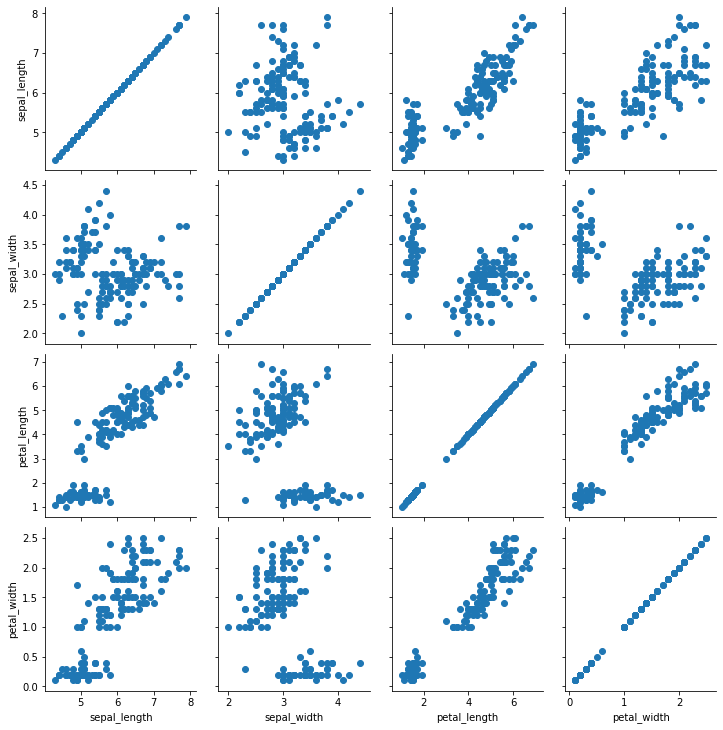

In [150]:
g = sns.PairGrid(iris) # P and G capital
g.map(plt.scatter)
# more control

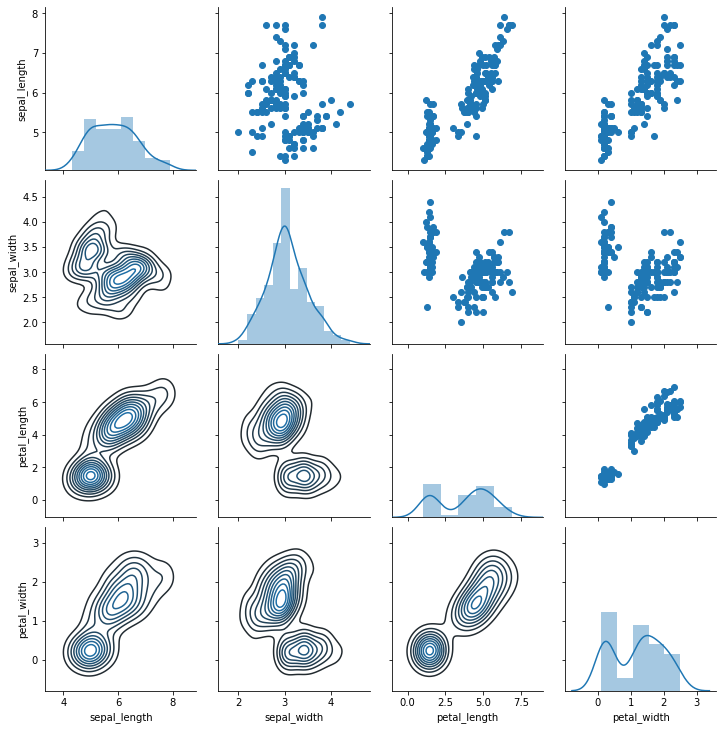

In [153]:
g = sns.PairGrid(iris) # P and G capital
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

# more control
# more variety of plots

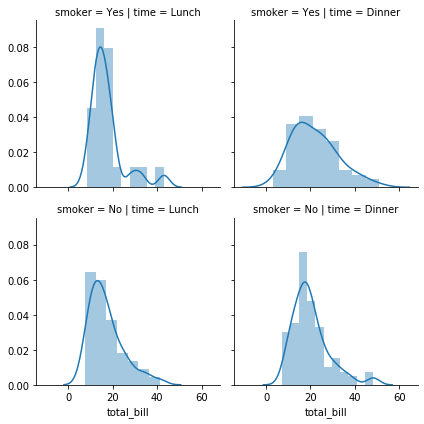

In [155]:
g = sns.FacetGrid(data=tips,col='time',row='smoker') #
g.map(sns.distplot,'total_bill')  # variable I am actually mapping for 

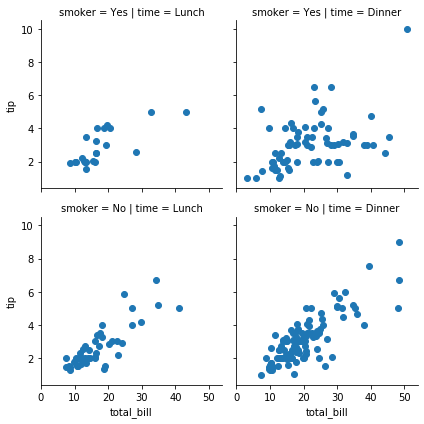

In [158]:
g = sns.FacetGrid(data=tips,col='time',row='smoker') # different grids 
g.map(plt.scatter,'total_bill','tip') # variable actually mapping for 
 

## Regression Plots

In [159]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


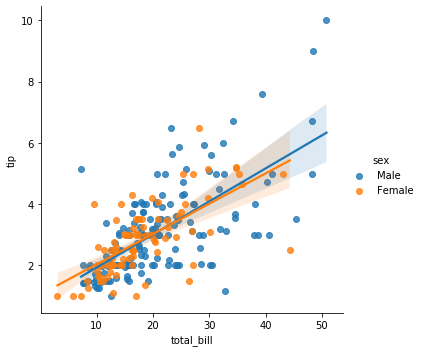

In [161]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex')  # by hue 

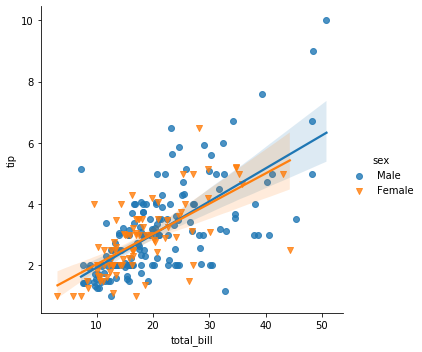

In [163]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'])

# putting different markers

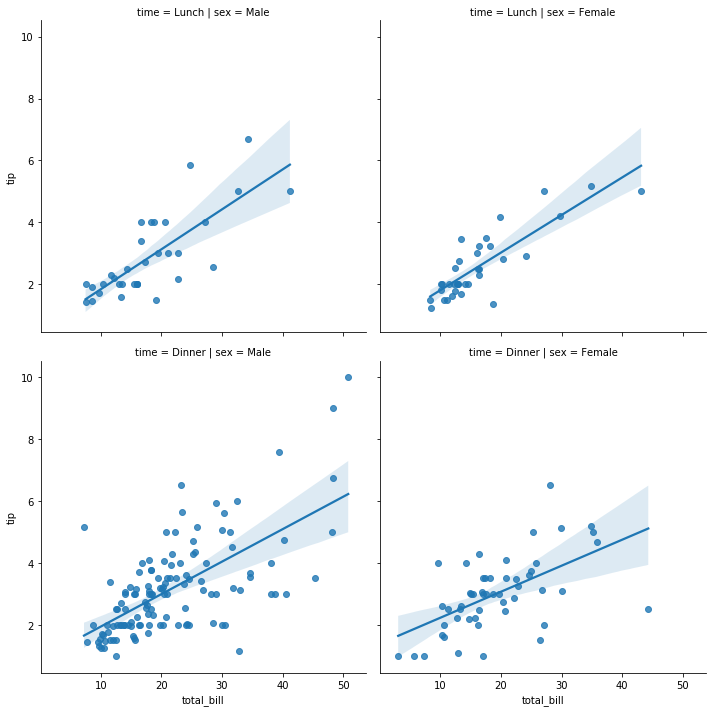

In [165]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex',row='time')  

# by rows and cols 
# Facet Grid

### Size has changed to Height

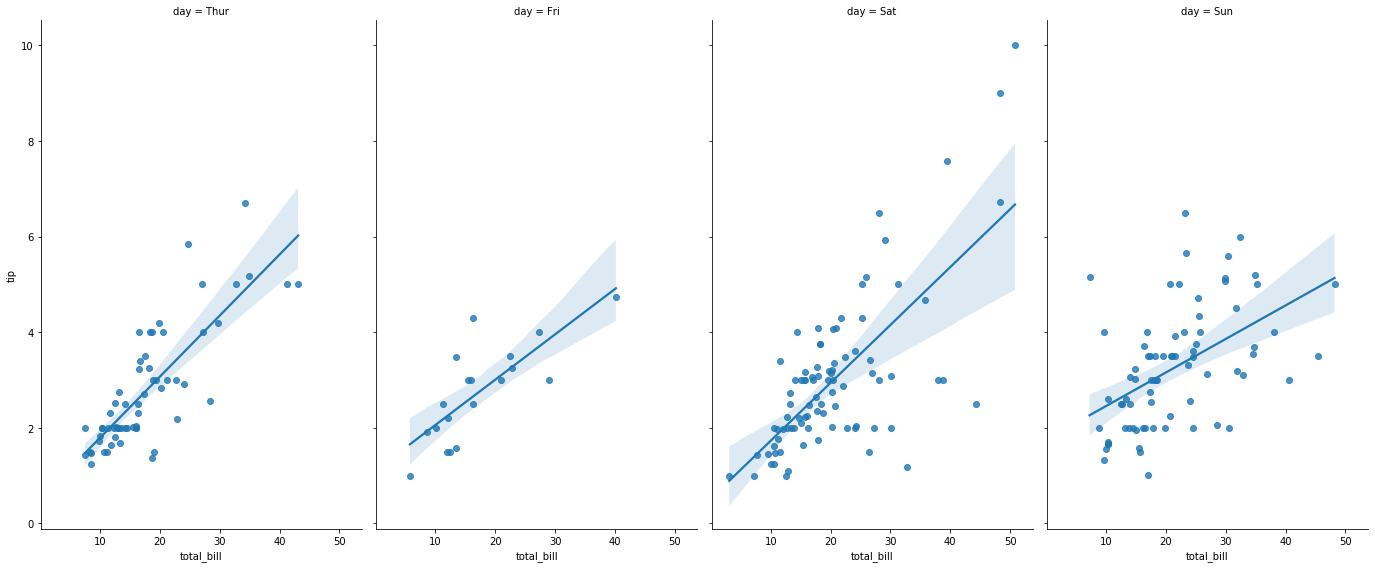

In [168]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',aspect=0.6,
          height=8)  

# by cols 
# Setting Aspect Ratio

## Style and Color

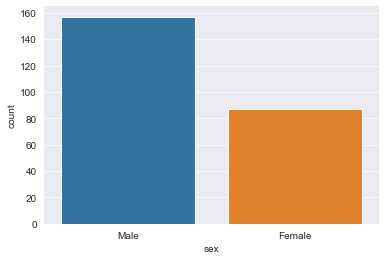

In [178]:
sns.set_style('darkgrid')    #ticks,whitegrid # setting background
sns.countplot(x='sex',data=tips)
sns.despine(left=True,bottom=False)   # removing the spine 

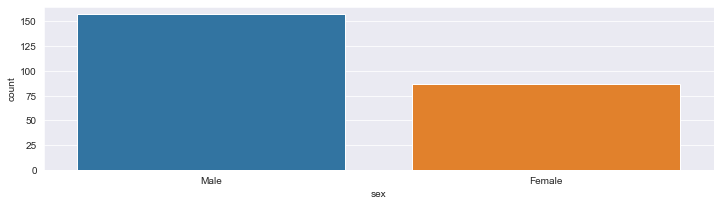

In [180]:
plt.figure(figsize=(12,3))     # setting the fig size 
sns.countplot(x='sex',data=tips)